In [1]:
import os, json, glob, math
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../pyusct/")
from rfdata import RFdata
from trainer import PCATrainer

In [3]:
LOCAL_PATH = "/media/yuhui/dea78678-112b-4f0f-acbf-4e9d1be35e35/nas/"
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/"
MODEL_DIR = "/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/PYUSCT_model/AE/"

In [4]:
dir_dataset = os.path.join(LOCAL_PATH, "PYUSCT_train/dataset028/")

In [5]:
%ls $dir_dataset

input/  input_file_paths.npy  list.csv  output/  output_file_paths.npy  sa/


### Load train data

In [6]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [7]:
input_files = sorted(glob.glob(os.path.join(dir_dataset, "input/*.npy")))
output_files = sorted(glob.glob(os.path.join(dir_dataset, "output/*.npy")))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_files, output_files, test_size=0.2, random_state=42)

#### debug

In [8]:
len(input_files), len(output_files)

(50000, 50000)

### Define dataloader

In [9]:
from AE import RFFullDataset

### Define network

In [10]:
# TODO cycle padding
from AE import Autoencoder

### Experiment

In [11]:
num_epochs = 16
batch_size = 42
learning_rate = 10e-5

In [12]:
dataset = RFFullDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [13]:
model = Autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [14]:
res = []
for epoch in range(num_epochs):
    tmp = []
    for data, _ in dataloader:
        data = Variable(data).cuda().float()
        
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tmp.append(loss.item())
        print('loss:{:.10f}'.format(loss.item()))
    # ===================log========================
    print('epoch [{}/{}], loss:{:.10f}'
          .format(epoch + 1, num_epochs, loss.item()))
    res.append(tmp)
    if epoch % 3 == 0:
        torch.save(model.state_dict(), os.path.join(MODEL_DIR, 'rf_conv_autoencoder_nearP_full50000.pth'))
        torch.save(model.state_dict(), './rf_conv_autoencoder_nearP_full50000.pth')
# torch.save(model.state_dict(), './rf_conv_autoencoder.pth')

loss:0.2088105679
loss:0.2060372829
loss:0.2037686259
loss:0.2020496130
loss:0.2005867362
loss:0.1991362721
loss:0.1978668422
loss:0.1965876222
loss:0.1954682022
loss:0.1944135278
loss:0.1932897121
loss:0.1924406737
loss:0.1913409382
loss:0.1903705448
loss:0.1892852187
loss:0.1883064210
loss:0.1874057800
loss:0.1865105480
loss:0.1853233278
loss:0.1844464839
loss:0.1832475364
loss:0.1821153462
loss:0.1805732846
loss:0.1797033995
loss:0.1779321283
loss:0.1768635213
loss:0.1751976907
loss:0.1731581986
loss:0.1715794653
loss:0.1699923426
loss:0.1676143110
loss:0.1659608334
loss:0.1641112566
loss:0.1621200889
loss:0.1601418257
loss:0.1582489610
loss:0.1555940658
loss:0.1534308940
loss:0.1509267688
loss:0.1489224136
loss:0.1465489268
loss:0.1442078799
loss:0.1415741593
loss:0.1388992965
loss:0.1364644170
loss:0.1341159195
loss:0.1318768263
loss:0.1283906102
loss:0.1265820563
loss:0.1242579147
loss:0.1214947701
loss:0.1186720729
loss:0.1160267219
loss:0.1113619059
loss:0.1099104211
loss:0.108

loss:0.0002571458
loss:0.0003305213
loss:0.0004699818
loss:0.0002620132
loss:0.0002658664
loss:0.0003287537
loss:0.0005315340
loss:0.0003117436
loss:0.0006131962
loss:0.0002270606
loss:0.0005001249
loss:0.0003346948
loss:0.0001943516
loss:0.0003209941
loss:0.0002608386
loss:0.0003327983
loss:0.0002816602
loss:0.0002489346
loss:0.0002973638
loss:0.0002699087
loss:0.0002375406
loss:0.0002186860
loss:0.0001812939
loss:0.0002259359
loss:0.0004393252
loss:0.0004128584
loss:0.0004503184
loss:0.0001647306
loss:0.0002531951
loss:0.0002165064
loss:0.0002177282
loss:0.0003506529
loss:0.0001810111
loss:0.0001722806
loss:0.0004385291
loss:0.0002581463
loss:0.0003836744
loss:0.0001943958
loss:0.0003466490
loss:0.0003001333
loss:0.0002117628
loss:0.0001967171
loss:0.0005213733
loss:0.0002448904
loss:0.0002965493
loss:0.0002427622
loss:0.0002897307
loss:0.0002009164
loss:0.0002263783
loss:0.0002986849
loss:0.0002229899
loss:0.0001980848
loss:0.0002607283
loss:0.0001946427
loss:0.0003675148
loss:0.000

loss:0.0000693378
loss:0.0001209949
loss:0.0000877760
loss:0.0000877276
loss:0.0000766292
loss:0.0067316946
loss:0.0001880822
loss:0.0000819502
loss:0.0000944772
loss:0.0000711098
loss:0.0000782121
loss:0.0000749534
loss:0.0000934382
loss:0.0000994459
loss:0.0000665147
loss:0.0000805780
loss:0.0000943559
loss:0.0001119010
loss:0.0000761453
loss:0.0000944366
loss:0.0001242076
loss:0.0000971420
loss:0.0000888880
loss:0.0001237337
loss:0.0000684320
loss:0.0000814585
loss:0.0001066376
loss:0.0000761135
loss:0.0000724317
loss:0.0001394451
loss:0.0000889456
loss:0.0000712841
loss:0.0000696856
loss:0.0000907619
loss:0.0000782102
loss:0.0000807636
loss:0.0000643749
loss:0.0000864296
loss:0.0000749085
loss:0.0000761664
loss:0.0000964453
loss:0.0000987847
loss:0.0001535841
loss:0.0000691949
loss:0.0001050729
loss:0.0000750508
loss:0.0001013646
loss:0.0000849684
loss:0.0000931346
loss:0.0000700122
loss:0.0001047625
loss:0.0000841530
loss:0.0000749646
loss:0.0001493254
loss:0.0000909567
loss:0.000

loss:0.0000550423
loss:0.0000651927
loss:0.0000583350
loss:0.0000686909
loss:0.0000553058
loss:0.0000566286
loss:0.0000586426
loss:0.0000845235
loss:0.0000614620
loss:0.0000588237
loss:0.0000643946
loss:0.0000584020
loss:0.0000544437
loss:0.0000552560
loss:0.0000699297
loss:0.0000651715
loss:0.0000603700
loss:0.0000547609
loss:0.0000581041
loss:0.0000631064
loss:0.0000601964
loss:0.0000559034
loss:0.0000526941
loss:0.0000559968
loss:0.0000714778
loss:0.0000567138
loss:0.0000840494
loss:0.0000565937
loss:0.0000564375
loss:0.0000586488
loss:0.0000719301
loss:0.0000557519
loss:0.0000549519
loss:0.0000519919
loss:0.0000563496
loss:0.0000558766
loss:0.0000513169
loss:0.0000556970
loss:0.0000625602
loss:0.0000562177
loss:0.0000547687
loss:0.0000591127
loss:0.0000549380
loss:0.0000843250
loss:0.0000614484
loss:0.0000662242
loss:0.0000873534
loss:0.0000635585
loss:0.0000576590
loss:0.0000589386
loss:0.0000606083
loss:0.0000595580
loss:0.0000552822
loss:0.0000580798
loss:0.0000537280
loss:0.000

loss:0.0000517684
loss:0.0000549237
loss:0.0000489548
loss:0.0000527022
loss:0.0000542091
loss:0.0000544656
loss:0.0000538547
loss:0.0000471259
loss:0.0000506885
loss:0.0000575830
loss:0.0000550188
loss:0.0000542853
loss:0.0000483845
loss:0.0000527059
loss:0.0000539348
loss:0.0000475743
loss:0.0000521618
loss:0.0000536664
loss:0.0000560740
loss:0.0000509138
loss:0.0000528030
loss:0.0000524261
loss:0.0000567889
loss:0.0000536944
loss:0.0000539451
loss:0.0000508162
loss:0.0000581983
loss:0.0000518777
loss:0.0000563195
loss:0.0000502118
loss:0.0000511575
loss:0.0000560525
loss:0.0000538739
loss:0.0000573247
loss:0.0000489930
loss:0.0000516360
loss:0.0000599857
loss:0.0000560817
loss:0.0000522342
loss:0.0000535100
loss:0.0000526135
loss:0.0000676360
loss:0.0000529583
loss:0.0000516158
loss:0.0000503783
loss:0.0000493590
loss:0.0000546855
loss:0.0000512534
loss:0.0000482592
loss:0.0000554206
loss:0.0000586905
loss:0.0000539606
loss:0.0000523101
loss:0.0000607208
loss:0.0000547790
loss:0.000

loss:0.0000512413
loss:0.0000526980
loss:0.0000485620
loss:0.0000531412
loss:0.0000472821
loss:0.0000529684
loss:0.0000493138
loss:0.0000550686
loss:0.0000485881
loss:0.0000492238
loss:0.0000516660
loss:0.0000501239
loss:0.0000538669
loss:0.0000499798
loss:0.0000569439
loss:0.0000530587
loss:0.0000489827
loss:0.0000487107
loss:0.0000523362
loss:0.0000552753
loss:0.0000569537
loss:0.0000550212
loss:0.0000491798
loss:0.0000521201
loss:0.0000519934
loss:0.0000537831
loss:0.0000506532
loss:0.0000489614
loss:0.0000490627
loss:0.0000495466
loss:0.0000518399
loss:0.0000555302
loss:0.0000494461
loss:0.0000569602
loss:0.0000613038
loss:0.0000500311
loss:0.0000477145
loss:0.0000515923
loss:0.0000495626
loss:0.0000527551
loss:0.0000512341
loss:0.0000481394
loss:0.0000481083
loss:0.0000530228
loss:0.0000516253
loss:0.0000541746
loss:0.0000513949
loss:0.0000519647
loss:0.0000484017
loss:0.0000485107
loss:0.0000517551
loss:0.0000598788
loss:0.0000512207
loss:0.0000480945
loss:0.0000480420
loss:0.000

loss:0.0000480725
loss:0.0000535987
loss:0.0000578799
loss:0.0000476573
loss:0.0000519082
loss:0.0000483824
loss:0.0000487082
loss:0.0000489782
loss:0.0000469996
loss:0.0000557329
loss:0.0000537051
loss:0.0000512443
loss:0.0000508979
loss:0.0000491892
loss:0.0000487719
loss:0.0000544217
loss:0.0000482840
loss:0.0000536478
loss:0.0000499499
loss:0.0000502424
loss:0.0000527854
loss:0.0000504365
loss:0.0000504125
loss:0.0000505922
loss:0.0000507572
loss:0.0000558728
loss:0.0000502565
loss:0.0000479867
loss:0.0000492347
loss:0.0000532394
loss:0.0000571659
loss:0.0000490444
loss:0.0000479722
loss:0.0000495775
loss:0.0000501193
loss:0.0000494351
loss:0.0000519245
loss:0.0000474227
loss:0.0000538689
loss:0.0000533074
loss:0.0000613663
loss:0.0000569491
loss:0.0000551496
loss:0.0000466487
loss:0.0000507340
loss:0.0000465693
loss:0.0000493828
loss:0.0000477000
loss:0.0000482184
loss:0.0000510249
loss:0.0000531757
loss:0.0000520092
loss:0.0000520355
loss:0.0000499188
loss:0.0000475568
loss:0.000

loss:0.0000483808
loss:0.0000512052
loss:0.0000471253
loss:0.0000499717
loss:0.0000491641
loss:0.0000491253
loss:0.0000490850
loss:0.0000518502
loss:0.0000516404
loss:0.0000492164
loss:0.0000458434
loss:0.0000496478
loss:0.0000529485
loss:0.0000549855
loss:0.0000508417
loss:0.0000482847
loss:0.0000509384
loss:0.0000550707
loss:0.0000466189
loss:0.0000523665
loss:0.0000467161
loss:0.0000541819
loss:0.0000492329
loss:0.0000510340
loss:0.0000530601
loss:0.0000572542
loss:0.0000488975
loss:0.0000475548
loss:0.0000484707
loss:0.0000491147
loss:0.0000532511
loss:0.0000501354
loss:0.0000477569
loss:0.0000472348
loss:0.0000530113
loss:0.0000487514
loss:0.0000521812
loss:0.0000476616
loss:0.0000507810
loss:0.0000492758
loss:0.0000519290
loss:0.0000537538
loss:0.0000490996
loss:0.0000518349
loss:0.0000496888
loss:0.0000511896
loss:0.0000488968
loss:0.0000472493
loss:0.0000509754
loss:0.0000484987
loss:0.0000462598
loss:0.0000523531
loss:0.0000500506
loss:0.0000515860
loss:0.0000625076
loss:0.000

loss:0.0000434132
loss:0.0000474301
loss:0.0000480182
loss:0.0000462705
loss:0.0000563875
loss:0.0000526091
loss:0.0000486928
loss:0.0000475216
loss:0.0000487341
loss:0.0000517387
loss:0.0000473700
loss:0.0000492814
loss:0.0000495371
loss:0.0000476467
loss:0.0000496509
loss:0.0000487387
loss:0.0000455188
loss:0.0000484779
loss:0.0000531958
loss:0.0000486935
loss:0.0000486630
loss:0.0000543128
loss:0.0000540066
loss:0.0000509389
loss:0.0000520452
loss:0.0000516260
loss:0.0000497429
loss:0.0000470863
loss:0.0000593225
loss:0.0000515957
loss:0.0000484692
loss:0.0000498612
loss:0.0000481427
loss:0.0000452257
loss:0.0000508937
loss:0.0000480744
loss:0.0000507993
loss:0.0000465831
loss:0.0000490329
loss:0.0000488426
loss:0.0000506376
loss:0.0000480432
loss:0.0000492016
loss:0.0000474748
loss:0.0000494330
loss:0.0000461592
loss:0.0000510069
loss:0.0000478804
loss:0.0000454622
loss:0.0000481459
loss:0.0000491016
loss:0.0000592357
loss:0.0000469957
loss:0.0000542801
loss:0.0000477703
loss:0.000

loss:0.0000477700
loss:0.0000491156
loss:0.0000523484
loss:0.0000510642
loss:0.0000507692
loss:0.0000497229
loss:0.0000527898
loss:0.0000491341
loss:0.0000520954
loss:0.0000491981
loss:0.0000480745
loss:0.0000505614
loss:0.0000513559
loss:0.0000482214
loss:0.0000506517
loss:0.0000487951
loss:0.0000469792
loss:0.0000460288
loss:0.0000479695
loss:0.0000534175
loss:0.0000448365
loss:0.0000459731
loss:0.0000473087
loss:0.0000477764
loss:0.0000471365
loss:0.0000491636
loss:0.0000519324
loss:0.0000538275
loss:0.0000557419
loss:0.0000482707
loss:0.0000514296
loss:0.0000481033
loss:0.0000464472
loss:0.0000476460
loss:0.0000482374
loss:0.0000487814
loss:0.0000527813
loss:0.0000549265
loss:0.0000491507
loss:0.0000499370
loss:0.0000486687
loss:0.0000508956
loss:0.0000509552
loss:0.0000496226
loss:0.0000495363
loss:0.0000505883
loss:0.0000485851
loss:0.0000497560
loss:0.0000492392
loss:0.0000515524
loss:0.0000480540
loss:0.0000531585
loss:0.0000493148
loss:0.0000486291
loss:0.0000489805
loss:0.000

loss:0.0000503665
loss:0.0000485086
loss:0.0000495295
loss:0.0000479750
loss:0.0000477757
loss:0.0000510152
loss:0.0000467118
loss:0.0000476161
loss:0.0000450380
loss:0.0000484797
loss:0.0000507733
loss:0.0000501011
loss:0.0000489538
loss:0.0000490825
loss:0.0000448134
loss:0.0000502094
loss:0.0000476691
loss:0.0000498713
loss:0.0000490462
loss:0.0000506460
loss:0.0000525892
loss:0.0000459827
loss:0.0000479834
loss:0.0000493214
loss:0.0000462731
loss:0.0000459541
loss:0.0000475474
loss:0.0000508813
loss:0.0000491029
loss:0.0000462049
loss:0.0000484769
loss:0.0000467132
loss:0.0000473770
loss:0.0000485539
loss:0.0000459158
loss:0.0000492991
loss:0.0000433997
loss:0.0000491253
loss:0.0000475062
loss:0.0000465467
loss:0.0000463738
loss:0.0000481299
loss:0.0000474021
loss:0.0000517845
loss:0.0000506578
loss:0.0000501811
loss:0.0000489203
loss:0.0000573949
loss:0.0000466586
loss:0.0000499426
loss:0.0000467033
loss:0.0000469384
loss:0.0000503896
loss:0.0000456648
loss:0.0000493198
loss:0.000

loss:0.0000466055
loss:0.0000490141
loss:0.0000473787
loss:0.0000450305
loss:0.0000464902
loss:0.0000448952
loss:0.0000477161
loss:0.0000483868
loss:0.0000482114
loss:0.0000509200
loss:0.0000444861
loss:0.0000439698
loss:0.0000495105
loss:0.0000481270
loss:0.0000513777
loss:0.0000476475
loss:0.0000460575
loss:0.0000515533
loss:0.0000481493
loss:0.0000475159
loss:0.0000482460
loss:0.0000480693
loss:0.0000434584
loss:0.0000462964
loss:0.0000449539
loss:0.0000506159
loss:0.0000491681
loss:0.0000503114
loss:0.0000443784
loss:0.0000436580
loss:0.0000478584
loss:0.0000487846
loss:0.0000522225
loss:0.0000498461
loss:0.0000472870
loss:0.0000465351
loss:0.0000471365
loss:0.0000511690
loss:0.0000475925
loss:0.0000492549
loss:0.0000473295
loss:0.0000478595
loss:0.0000434749
loss:0.0000467051
loss:0.0000472771
loss:0.0000506070
loss:0.0000497768
loss:0.0000497575
loss:0.0000522611
loss:0.0000476767
loss:0.0000493728
loss:0.0000471386
loss:0.0000477461
loss:0.0000459704
loss:0.0000489395
loss:0.000

loss:0.0000504550
loss:0.0000477028
loss:0.0000507075
loss:0.0000485943
loss:0.0000528007
loss:0.0000494830
loss:0.0000481375
loss:0.0000516871
loss:0.0000459098
loss:0.0000485243
loss:0.0000489015
loss:0.0000480973
loss:0.0000527506
loss:0.0000471109
loss:0.0000503730
loss:0.0000495775
loss:0.0000506827
loss:0.0000482249
loss:0.0000476131
loss:0.0000476889
loss:0.0000513195
loss:0.0000539537
loss:0.0000473908
loss:0.0000498451
loss:0.0000485044
loss:0.0000490703
loss:0.0000515545
loss:0.0000451192
loss:0.0000437850
loss:0.0000479669
loss:0.0000463553
loss:0.0000449584
loss:0.0000481244
loss:0.0000465751
loss:0.0000451304
loss:0.0000513258
loss:0.0000448771
loss:0.0000503872
loss:0.0000473070
loss:0.0000450540
loss:0.0000481200
loss:0.0000468599
loss:0.0000431309
loss:0.0000500961
loss:0.0000504669
loss:0.0000442498
loss:0.0000466658
loss:0.0000431026
loss:0.0000473924
loss:0.0000469993
loss:0.0000502466
loss:0.0000518579
loss:0.0000463826
loss:0.0000462463
loss:0.0000509481
loss:0.000

loss:0.0000470394
loss:0.0000480160
loss:0.0000494184
loss:0.0000518997
loss:0.0000475277
loss:0.0000461207
loss:0.0000456982
loss:0.0000478821
loss:0.0000478382
loss:0.0000463037
loss:0.0000533061
loss:0.0000462623
loss:0.0000534993
loss:0.0000491221
loss:0.0000504046
loss:0.0000454912
loss:0.0000458213
loss:0.0000502376
loss:0.0000457617
loss:0.0000451430
loss:0.0000451539
loss:0.0000530882
loss:0.0000489824
loss:0.0000488864
loss:0.0000464438
loss:0.0000460623
loss:0.0000499822
loss:0.0000503185
loss:0.0000478425
loss:0.0000510419
loss:0.0000452407
loss:0.0000496333
loss:0.0000473371
loss:0.0000515880
loss:0.0000461478
epoch [5/16], loss:0.0000461478
loss:0.0000493890
loss:0.0000535981
loss:0.0000512149
loss:0.0000449732
loss:0.0000455776
loss:0.0000464276
loss:0.0000464386
loss:0.0000518692
loss:0.0000474703
loss:0.0000533672
loss:0.0000561178
loss:0.0000513911
loss:0.0000485457
loss:0.0000479578
loss:0.0000523874
loss:0.0000515270
loss:0.0000487651
loss:0.0000450821
loss:0.0000506

loss:0.0000478620
loss:0.0000533755
loss:0.0000465978
loss:0.0000507812
loss:0.0000494654
loss:0.0000452621
loss:0.0000486672
loss:0.0000483109
loss:0.0000471554
loss:0.0000512269
loss:0.0000496973
loss:0.0000451207
loss:0.0000476770
loss:0.0000446461
loss:0.0000541147
loss:0.0000477776
loss:0.0000457817
loss:0.0000456545
loss:0.0000584555
loss:0.0000432189
loss:0.0000447340
loss:0.0000493908
loss:0.0000445011
loss:0.0000460223
loss:0.0000490344
loss:0.0000464178
loss:0.0000498139
loss:0.0000448003
loss:0.0000437851
loss:0.0000458641
loss:0.0000443515
loss:0.0000475267
loss:0.0000466906
loss:0.0000436714
loss:0.0000472099
loss:0.0000458253
loss:0.0000451750
loss:0.0000506698
loss:0.0000490413
loss:0.0000488999
loss:0.0000458580
loss:0.0000512932
loss:0.0000486747
loss:0.0000456825
loss:0.0000501755
loss:0.0000477026
loss:0.0000493597
loss:0.0000471987
loss:0.0000498989
loss:0.0000467075
loss:0.0000485338
loss:0.0000527727
loss:0.0000473448
loss:0.0000440833
loss:0.0000463105
loss:0.000

loss:0.0000509961
loss:0.0000434679
loss:0.0000447058
loss:0.0000461735
loss:0.0000503200
loss:0.0000503469
loss:0.0000445093
loss:0.0000439951
loss:0.0000470483
loss:0.0000493294
loss:0.0000479740
loss:0.0000469083
loss:0.0000485752
loss:0.0000488733
loss:0.0000480049
loss:0.0000534885
loss:0.0000446510
loss:0.0000537529
loss:0.0000485850
loss:0.0000434972
loss:0.0000485643
loss:0.0000482843
loss:0.0000469516
loss:0.0000435830
loss:0.0000453852
loss:0.0000482120
loss:0.0000480756
loss:0.0000483607
loss:0.0000458092
loss:0.0000488731
loss:0.0000471227
loss:0.0000491813
loss:0.0000474854
loss:0.0000445616
loss:0.0000521899
loss:0.0000494794
loss:0.0000454770
loss:0.0000492941
loss:0.0000478948
loss:0.0000469638
loss:0.0000512449
loss:0.0000496279
loss:0.0000487771
loss:0.0000431379
loss:0.0000450528
loss:0.0000489526
loss:0.0000465708
loss:0.0000466532
loss:0.0000516518
loss:0.0000504206
loss:0.0000489776
loss:0.0000544742
loss:0.0000455315
loss:0.0000474096
loss:0.0000460593
loss:0.000

loss:0.0000457917
loss:0.0000497718
loss:0.0000486492
loss:0.0000508330
loss:0.0000474520
loss:0.0000474641
loss:0.0000506361
loss:0.0000445683
loss:0.0000478384
loss:0.0000434769
loss:0.0000470008
loss:0.0000481709
loss:0.0000481555
loss:0.0000499479
loss:0.0000491003
loss:0.0000454327
loss:0.0000459605
loss:0.0000474183
loss:0.0000449036
loss:0.0000428016
loss:0.0000480670
loss:0.0000438194
loss:0.0000465228
loss:0.0000499830
loss:0.0000450285
loss:0.0000466588
loss:0.0000487545
loss:0.0000521954
loss:0.0000495925
loss:0.0000457050
loss:0.0000487757
loss:0.0000478949
loss:0.0000500202
loss:0.0000472732
loss:0.0000510762
loss:0.0000460536
loss:0.0000456561
loss:0.0000486404
loss:0.0000442886
loss:0.0000502863
loss:0.0000501181
loss:0.0000471119
loss:0.0000494659
loss:0.0000466953
loss:0.0000474843
loss:0.0000441157
loss:0.0000496537
loss:0.0000454920
loss:0.0000462243
loss:0.0000485360
loss:0.0000495619
loss:0.0000462957
loss:0.0000444066
loss:0.0000437840
loss:0.0000454721
loss:0.000

loss:0.0000453820
loss:0.0000435060
loss:0.0000446689
loss:0.0000485166
loss:0.0000440217
loss:0.0000508347
loss:0.0000454104
loss:0.0000458344
loss:0.0000446029
loss:0.0000446958
loss:0.0000466486
loss:0.0000512902
loss:0.0000529102
loss:0.0000473185
loss:0.0000456867
loss:0.0000493129
loss:0.0000452284
loss:0.0000450937
loss:0.0000485173
loss:0.0000450322
loss:0.0000462290
loss:0.0000474563
loss:0.0000497065
loss:0.0000469945
loss:0.0000462080
loss:0.0000494176
loss:0.0000488073
loss:0.0000439242
loss:0.0000458662
loss:0.0000503059
loss:0.0000447640
loss:0.0000490156
loss:0.0000492294
loss:0.0000462556
loss:0.0000466447
loss:0.0000472869
loss:0.0000488315
loss:0.0000485275
loss:0.0000493357
loss:0.0000479731
loss:0.0000480237
loss:0.0000420537
loss:0.0000477399
loss:0.0000467579
loss:0.0000444479
loss:0.0000436742
loss:0.0000432794
loss:0.0000468462
loss:0.0000454054
loss:0.0000457768
loss:0.0000456778
loss:0.0000448671
loss:0.0000468828
loss:0.0000463082
loss:0.0000474148
loss:0.000

loss:0.0000476430
loss:0.0000462696
loss:0.0000482306
loss:0.0000492792
loss:0.0000492052
loss:0.0000455963
loss:0.0000512968
loss:0.0000505395
loss:0.0000444305
loss:0.0000524801
loss:0.0000460411
loss:0.0000438919
loss:0.0000475074
loss:0.0000508857
loss:0.0000441820
loss:0.0000473924
loss:0.0000514758
loss:0.0000489940
loss:0.0000453053
loss:0.0000477898
loss:0.0000480852
loss:0.0000470065
loss:0.0000489880
loss:0.0000453503
loss:0.0000471765
loss:0.0000439577
loss:0.0000456824
loss:0.0000484347
loss:0.0000481683
loss:0.0000450370
loss:0.0000461051
loss:0.0000462225
loss:0.0000487043
loss:0.0000449546
loss:0.0000468112
loss:0.0000483027
loss:0.0000514262
loss:0.0000440039
loss:0.0000452655
loss:0.0000462302
loss:0.0000458008
loss:0.0000439421
loss:0.0000452722
loss:0.0000444196
loss:0.0000518867
loss:0.0000454309
loss:0.0000481456
loss:0.0000485157
loss:0.0000470450
loss:0.0000466477
loss:0.0000484200
loss:0.0000484785
loss:0.0000468563
loss:0.0000464144
loss:0.0000489089
loss:0.000

loss:0.0000505932
loss:0.0000441377
loss:0.0000469132
loss:0.0000485827
loss:0.0000437562
loss:0.0000470902
loss:0.0000476605
loss:0.0000496479
loss:0.0000473278
loss:0.0000470336
loss:0.0000499057
loss:0.0000470561
loss:0.0000470562
loss:0.0000502862
loss:0.0000449451
loss:0.0000467706
loss:0.0000477753
loss:0.0000492522
loss:0.0000466505
loss:0.0000443509
loss:0.0000438442
loss:0.0000484341
loss:0.0000462719
loss:0.0000455423
loss:0.0000506557
loss:0.0000455961
loss:0.0000475522
loss:0.0000494708
loss:0.0000469660
loss:0.0000467046
loss:0.0000512043
loss:0.0000454745
loss:0.0000470423
loss:0.0000447479
loss:0.0000486790
loss:0.0000489427
loss:0.0000451388
loss:0.0000446878
loss:0.0000454387
loss:0.0000496704
loss:0.0000538739
loss:0.0000431601
loss:0.0000469499
loss:0.0000427514
loss:0.0000433158
loss:0.0000455269
loss:0.0000443613
loss:0.0000474039
loss:0.0000478097
loss:0.0000443284
loss:0.0000510426
loss:0.0000419173
loss:0.0000430507
loss:0.0000442334
loss:0.0000439222
loss:0.000

loss:0.0000486143
loss:0.0000463973
loss:0.0000443233
loss:0.0000464931
loss:0.0000450461
loss:0.0000453791
loss:0.0000480378
loss:0.0000474534
loss:0.0000414157
loss:0.0000483441
loss:0.0000458318
loss:0.0000494681
loss:0.0000470200
loss:0.0000500012
loss:0.0000443864
loss:0.0000448908
loss:0.0000484847
loss:0.0000540824
loss:0.0000458649
loss:0.0000505893
loss:0.0000441764
loss:0.0000491093
loss:0.0000497662
loss:0.0000447076
loss:0.0000462322
loss:0.0000452888
loss:0.0000456154
loss:0.0000409747
loss:0.0000508890
loss:0.0000485434
loss:0.0000481892
loss:0.0000454103
loss:0.0000478747
loss:0.0000489147
loss:0.0000452884
loss:0.0000462940
loss:0.0000453323
loss:0.0000498443
loss:0.0000451495
loss:0.0000461449
loss:0.0000438115
loss:0.0000487419
loss:0.0000454973
loss:0.0000460303
loss:0.0000452694
loss:0.0000485339
loss:0.0000484230
loss:0.0000470351
loss:0.0000478364
loss:0.0000489675
loss:0.0000415512
loss:0.0000462415
loss:0.0000476411
loss:0.0000451498
loss:0.0000482118
loss:0.000

loss:0.0000483274
loss:0.0000498268
loss:0.0000428899
loss:0.0000453364
loss:0.0000481942
loss:0.0000481755
loss:0.0000447081
loss:0.0000470273
loss:0.0000456470
loss:0.0000491461
loss:0.0000461849
loss:0.0000471141
loss:0.0000461164
loss:0.0000456900
loss:0.0000469632
loss:0.0000455721
loss:0.0000474939
loss:0.0000440800
loss:0.0000493083
loss:0.0000452151
loss:0.0000479143
loss:0.0000442752
loss:0.0000480053
loss:0.0000487671
loss:0.0000440323
loss:0.0000426991
loss:0.0000459733
loss:0.0000466349
loss:0.0000462989
loss:0.0000475306
loss:0.0000460308
loss:0.0000466632
loss:0.0000494340
loss:0.0000505522
loss:0.0000430447
loss:0.0000473293
loss:0.0000446757
loss:0.0000490631
loss:0.0000482854
loss:0.0000432794
loss:0.0000470990
loss:0.0000471180
loss:0.0000433982
loss:0.0000462743
loss:0.0000456711
loss:0.0000434567
loss:0.0000499067
loss:0.0000444682
loss:0.0000449287
loss:0.0000462568
loss:0.0000475351
loss:0.0000429514
loss:0.0000428428
loss:0.0000443771
loss:0.0000437063
loss:0.000

loss:0.0000455128
loss:0.0000487162
loss:0.0000456252
loss:0.0000464838
loss:0.0000448026
loss:0.0000473200
loss:0.0000444932
loss:0.0000422608
loss:0.0000496065
loss:0.0000475763
loss:0.0000451861
loss:0.0000430030
loss:0.0000458472
loss:0.0000467649
loss:0.0000469196
loss:0.0000491087
loss:0.0000472859
loss:0.0000461133
loss:0.0000423640
loss:0.0000463206
loss:0.0000425669
loss:0.0000459139
loss:0.0000540678
loss:0.0000445730
loss:0.0000437022
loss:0.0000472601
loss:0.0000451733
loss:0.0000489337
loss:0.0000465632
loss:0.0000474778
loss:0.0000442429
loss:0.0000450004
loss:0.0000458648
loss:0.0000466771
loss:0.0000423741
loss:0.0000456603
loss:0.0000469897
loss:0.0000436498
loss:0.0000468678
loss:0.0000486408
loss:0.0000448389
loss:0.0000519381
loss:0.0000457282
loss:0.0000492183
loss:0.0000478903
loss:0.0000476306
loss:0.0000476367
loss:0.0000486015
loss:0.0000452824
loss:0.0000508022
loss:0.0000443420
loss:0.0000584125
loss:0.0000429234
loss:0.0000478458
loss:0.0000476763
loss:0.000

loss:0.0000478637
loss:0.0000469827
loss:0.0000432356
loss:0.0000423505
loss:0.0000500813
loss:0.0000486238
loss:0.0000451142
loss:0.0000500827
loss:0.0000453186
loss:0.0000481636
loss:0.0000485245
loss:0.0000434140
loss:0.0000488064
loss:0.0000428013
loss:0.0000478903
loss:0.0000461349
loss:0.0000470335
loss:0.0000466877
loss:0.0000472734
loss:0.0000464317
loss:0.0000462044
loss:0.0000462554
loss:0.0000469233
loss:0.0000497016
loss:0.0000472084
loss:0.0000470881
loss:0.0000471285
loss:0.0000436188
loss:0.0000471852
loss:0.0000449232
loss:0.0000451515
loss:0.0000446484
loss:0.0000503202
loss:0.0000490554
loss:0.0000442205
loss:0.0000435908
loss:0.0000460556
loss:0.0000472446
loss:0.0000465252
loss:0.0000462088
loss:0.0000455307
loss:0.0000461963
loss:0.0000473487
loss:0.0000454256
loss:0.0000404932
loss:0.0000446358
loss:0.0000577198
loss:0.0000450995
loss:0.0000439553
loss:0.0000430116
loss:0.0000481350
loss:0.0000423115
loss:0.0000458649
loss:0.0000496051
loss:0.0000455278
loss:0.000

loss:0.0000440611
loss:0.0000497452
loss:0.0000434570
loss:0.0000482517
loss:0.0000465478
loss:0.0000443303
loss:0.0000472502
loss:0.0000452958
loss:0.0000472683
loss:0.0000464866
loss:0.0000454117
loss:0.0000451031
loss:0.0000477770
loss:0.0000447002
loss:0.0000483035
loss:0.0000501690
loss:0.0000433639
loss:0.0000456065
loss:0.0000448966
loss:0.0000456852
loss:0.0000466129
loss:0.0000460449
loss:0.0000441908
loss:0.0000450085
loss:0.0000490606
loss:0.0000466621
loss:0.0000429829
loss:0.0000469619
loss:0.0000509884
loss:0.0000502121
loss:0.0000493842
loss:0.0000476896
loss:0.0000479396
loss:0.0000475735
loss:0.0000462898
loss:0.0000448924
loss:0.0000437159
loss:0.0000499749
loss:0.0000487900
loss:0.0000481420
loss:0.0000430862
loss:0.0000457777
loss:0.0000486068
loss:0.0000465292
loss:0.0000461440
loss:0.0000448404
loss:0.0000468499
loss:0.0000445442
loss:0.0000474145
loss:0.0000460818
loss:0.0000437209
loss:0.0000456613
loss:0.0000452172
loss:0.0000486233
loss:0.0000478756
loss:0.000

loss:0.0000460394
loss:0.0000506981
loss:0.0000480945
loss:0.0000455012
loss:0.0000482358
loss:0.0000430598
loss:0.0000439789
loss:0.0000443645
loss:0.0000485120
loss:0.0000492062
loss:0.0000455514
loss:0.0000460777
loss:0.0000465587
loss:0.0000464799
loss:0.0000445238
loss:0.0000457360
loss:0.0000515872
loss:0.0000444561
loss:0.0000459344
loss:0.0000461299
loss:0.0000428039
loss:0.0000438325
loss:0.0000500793
loss:0.0000470835
loss:0.0000466758
loss:0.0000438278
loss:0.0000435696
loss:0.0000512047
loss:0.0000464910
loss:0.0000484910
loss:0.0000477430
loss:0.0000444350
loss:0.0000448374
loss:0.0000497570
loss:0.0000470450
loss:0.0000472766
loss:0.0000467206
loss:0.0000521316
loss:0.0000448529
loss:0.0000464610
loss:0.0000449308
loss:0.0000438379
loss:0.0000432676
loss:0.0000442580
loss:0.0000452915
loss:0.0000470305
loss:0.0000406109
loss:0.0000490844
loss:0.0000468118
loss:0.0000445320
loss:0.0000462463
loss:0.0000497761
loss:0.0000470489
loss:0.0000450060
loss:0.0000488336
loss:0.000

loss:0.0000481098
loss:0.0000465764
loss:0.0000469923
loss:0.0000430497
loss:0.0000497341
loss:0.0000464685
loss:0.0000490175
loss:0.0000485275
loss:0.0000501387
loss:0.0000481972
loss:0.0000463882
loss:0.0000461260
loss:0.0000474056
loss:0.0000448827
loss:0.0000472158
loss:0.0000477937
loss:0.0000464211
loss:0.0000438973
loss:0.0000469918
loss:0.0000489553
loss:0.0000447214
loss:0.0000478700
loss:0.0000458302
loss:0.0000396172
loss:0.0000463471
loss:0.0000495826
loss:0.0000465879
loss:0.0000443536
loss:0.0000457140
loss:0.0000438104
loss:0.0000457041
loss:0.0000485334
loss:0.0000476258
loss:0.0000454911
loss:0.0000471223
loss:0.0000455768
loss:0.0000460063
loss:0.0000446656
loss:0.0000448118
loss:0.0000459191
loss:0.0000466500
loss:0.0000508478
loss:0.0000435496
loss:0.0000466149
loss:0.0000477291
loss:0.0000478822
loss:0.0000455696
loss:0.0000457005
loss:0.0000517342
loss:0.0000474813
loss:0.0000446474
loss:0.0000449379
loss:0.0000450981
loss:0.0000473358
loss:0.0000516104
loss:0.000

loss:0.0000484773
loss:0.0000469899
loss:0.0000465371
loss:0.0000463923
loss:0.0000461034
loss:0.0000439949
loss:0.0000476103
loss:0.0000453961
loss:0.0000502985
loss:0.0000433466
loss:0.0000485423
loss:0.0000483828
loss:0.0000471697
loss:0.0000481633
loss:0.0000461562
loss:0.0000486219
loss:0.0000473326
loss:0.0000488605
loss:0.0000445592
loss:0.0000453869
loss:0.0000487996
loss:0.0000481196
loss:0.0000453476
loss:0.0000456468
loss:0.0000450284
loss:0.0000437583
loss:0.0000443814
loss:0.0000486367
loss:0.0000467116
loss:0.0000471713
loss:0.0000442481
loss:0.0000423517
loss:0.0000446481
loss:0.0000482282
loss:0.0000478245
loss:0.0000462255
loss:0.0000474379
loss:0.0000438220
loss:0.0000441431
loss:0.0000450158
loss:0.0000466884
loss:0.0000444605
loss:0.0000474540
loss:0.0000436529
loss:0.0000455563
loss:0.0000449322
loss:0.0000474252
loss:0.0000464043
loss:0.0000443812
loss:0.0000479263
loss:0.0000445242
loss:0.0000482657
loss:0.0000427606
loss:0.0000464651
loss:0.0000462413
loss:0.000

loss:0.0000469168
loss:0.0000444021
loss:0.0000476835
loss:0.0000427275
loss:0.0000448244
loss:0.0000434277
loss:0.0000467582
loss:0.0000466711
loss:0.0000497599
loss:0.0000466026
loss:0.0000457218
loss:0.0000425686
loss:0.0000502417
loss:0.0000447398
loss:0.0000481115
loss:0.0000486675
loss:0.0000445743
loss:0.0000525950
loss:0.0000475980
loss:0.0000466990
loss:0.0000499021
loss:0.0000473103
loss:0.0000481886
loss:0.0000465430
loss:0.0000494352
loss:0.0000468860
loss:0.0000478825
loss:0.0000429698
loss:0.0000489206
loss:0.0000435422
loss:0.0000450249
loss:0.0000485912
loss:0.0000481054
loss:0.0000414862
loss:0.0000438234
loss:0.0000484168
loss:0.0000501556
loss:0.0000466560
loss:0.0000436172
loss:0.0000483738
loss:0.0000434105
loss:0.0000453809
loss:0.0000445712
loss:0.0000478064
loss:0.0000489158
loss:0.0000456413
loss:0.0000487283
loss:0.0000458473
loss:0.0000471323
loss:0.0000441667
loss:0.0000505981
loss:0.0000473502
loss:0.0000477684
loss:0.0000445845
loss:0.0000460285
loss:0.000

loss:0.0000437899
loss:0.0000473191
loss:0.0000489715
loss:0.0000485423
loss:0.0000473304
loss:0.0000456324
loss:0.0000430048
loss:0.0000440665
loss:0.0000491633
loss:0.0000455557
loss:0.0000492784
loss:0.0000455585
loss:0.0000455622
loss:0.0000530739
loss:0.0000474395
loss:0.0000449884
loss:0.0000511431
loss:0.0000475452
loss:0.0000470637
loss:0.0000429708
loss:0.0000464943
loss:0.0000454651
loss:0.0000461041
loss:0.0000481670
loss:0.0000478456
loss:0.0000498818
loss:0.0000451745
loss:0.0000444927
loss:0.0000485896
loss:0.0000470692
loss:0.0000462032
loss:0.0000483130
loss:0.0000478824
loss:0.0000465542
loss:0.0000446716
loss:0.0000458460
loss:0.0000471301
loss:0.0000460053
loss:0.0000452271
loss:0.0000459443
loss:0.0000442498
loss:0.0000432789
loss:0.0000434379
loss:0.0000455286
loss:0.0000427629
loss:0.0000448411
loss:0.0000499741
loss:0.0000502201
loss:0.0000455640
loss:0.0000484042
loss:0.0000486596
loss:0.0000434071
loss:0.0000494751
loss:0.0000445108
loss:0.0000486587
loss:0.000

loss:0.0000433624
loss:0.0000436376
loss:0.0000471388
loss:0.0000439153
loss:0.0000469204
loss:0.0000458409
loss:0.0000475483
loss:0.0000452676
loss:0.0000466784
loss:0.0000440932
loss:0.0000452962
loss:0.0000449250
loss:0.0000508021
loss:0.0000422983
loss:0.0000466617
loss:0.0000446977
loss:0.0000452905
loss:0.0000440950
loss:0.0000455612
loss:0.0000457158
loss:0.0000464944
loss:0.0000465744
loss:0.0000512337
loss:0.0000437733
loss:0.0000480554
loss:0.0000441462
loss:0.0000468003
loss:0.0000479548
loss:0.0000494659
loss:0.0000458977
loss:0.0000415523
loss:0.0000451085
loss:0.0000437987
loss:0.0000470891
loss:0.0000447867
loss:0.0000460886
loss:0.0000441076
loss:0.0000447349
loss:0.0000450820
loss:0.0000476261
loss:0.0000455443
loss:0.0000441533
loss:0.0000466477
loss:0.0000487390
loss:0.0000449625
loss:0.0000452206
loss:0.0000485435
loss:0.0000473635
loss:0.0000467286
loss:0.0000465436
loss:0.0000461335
loss:0.0000447048
loss:0.0000414478
loss:0.0000450474
loss:0.0000430611
loss:0.000

loss:0.0000458579
loss:0.0000429009
loss:0.0000515516
loss:0.0000468201
loss:0.0000496672
loss:0.0000475040
loss:0.0000451618
loss:0.0000445389
loss:0.0000473328
loss:0.0000458877
loss:0.0000488775
loss:0.0000437430
loss:0.0000506233
loss:0.0000477239
loss:0.0000449181
loss:0.0000501744
loss:0.0000479335
loss:0.0000460959
loss:0.0000453691
loss:0.0000435525
loss:0.0000421700
loss:0.0000419458
loss:0.0000453667
loss:0.0000441396
loss:0.0000452273
loss:0.0000463652
loss:0.0000467050
loss:0.0000494965
loss:0.0000508899
loss:0.0000452862
loss:0.0000440110
loss:0.0000425953
loss:0.0000438360
loss:0.0000442505
loss:0.0000445066
loss:0.0000480364
loss:0.0000470360
loss:0.0000428039
loss:0.0000443841
loss:0.0000477773
loss:0.0000412004
loss:0.0000476355
loss:0.0000482955
loss:0.0000487766
loss:0.0000475926
loss:0.0000425399
loss:0.0000451677
loss:0.0000494425
loss:0.0000444093
loss:0.0000472436
loss:0.0000508878
loss:0.0000450026
loss:0.0000521722
loss:0.0000483991
loss:0.0000451461
loss:0.000

loss:0.0000437676
loss:0.0000429373
loss:0.0000435377
loss:0.0000416945
loss:0.0000436322
loss:0.0000451565
loss:0.0000457246
loss:0.0000428851
loss:0.0000444602
loss:0.0000462123
loss:0.0000465699
loss:0.0000480945
loss:0.0000455386
loss:0.0000430686
loss:0.0000452596
loss:0.0000457087
loss:0.0000462935
loss:0.0000449752
loss:0.0000420925
loss:0.0000444249
loss:0.0000411257
loss:0.0000464098
loss:0.0000470952
loss:0.0000453282
loss:0.0000405942
loss:0.0000427749
loss:0.0000414132
loss:0.0000460492
loss:0.0000424869
loss:0.0000476910
loss:0.0000438727
loss:0.0000458276
loss:0.0000435423
loss:0.0000455320
loss:0.0000441628
loss:0.0000455433
loss:0.0000445670
loss:0.0000449763
loss:0.0000459886
loss:0.0000470209
loss:0.0000449144
loss:0.0000429454
loss:0.0000509509
loss:0.0000403300
loss:0.0000470793
loss:0.0000456623
loss:0.0000422861
loss:0.0000421234
loss:0.0000451093
loss:0.0000442816
loss:0.0000448681
loss:0.0000443105
loss:0.0000434242
loss:0.0000424389
loss:0.0000432205
loss:0.000

loss:0.0000449619
loss:0.0000400255
loss:0.0000447761
loss:0.0000421268
loss:0.0000483587
loss:0.0000452287
loss:0.0000397689
loss:0.0000495774
loss:0.0000407143
loss:0.0000456364
loss:0.0000434139
loss:0.0000460867
loss:0.0000432513
loss:0.0000410386
loss:0.0000440405
loss:0.0000443247
loss:0.0000398692
loss:0.0000397964
loss:0.0000457297
loss:0.0000466420
loss:0.0000451398
loss:0.0000422039
loss:0.0000454847
loss:0.0000415695
loss:0.0000500134
loss:0.0000402915
loss:0.0000402427
loss:0.0000419722
loss:0.0000425820
loss:0.0000433082
loss:0.0000417026
loss:0.0000463808
loss:0.0000467907
loss:0.0000445141
loss:0.0000446490
loss:0.0000413327
loss:0.0000415598
loss:0.0000472562
loss:0.0000424935
loss:0.0000405552
loss:0.0000440172
loss:0.0000416175
loss:0.0000425827
loss:0.0000409678
loss:0.0000431724
loss:0.0000431604
loss:0.0000414326
loss:0.0000457504
loss:0.0000443661
loss:0.0000457512
loss:0.0000473793
loss:0.0000481184
loss:0.0000445222
loss:0.0000448023
loss:0.0000454374
loss:0.000

loss:0.0000439609
loss:0.0000415098
loss:0.0000445155
epoch [13/16], loss:0.0000445155
loss:0.0000442940
loss:0.0000427409
loss:0.0000421937
loss:0.0000483297
loss:0.0000451963
loss:0.0000421154
loss:0.0000453846
loss:0.0000422076
loss:0.0000421649
loss:0.0000428358
loss:0.0000458175
loss:0.0000408942
loss:0.0000415368
loss:0.0000460061
loss:0.0000464649
loss:0.0000408691
loss:0.0000467974
loss:0.0000430220
loss:0.0000454764
loss:0.0000403314
loss:0.0000406308
loss:0.0000463315
loss:0.0000410271
loss:0.0000430497
loss:0.0000449024
loss:0.0000428546
loss:0.0000414442
loss:0.0000425051
loss:0.0000412076
loss:0.0000437904
loss:0.0000395191
loss:0.0000462197
loss:0.0000418956
loss:0.0000453065
loss:0.0000436156
loss:0.0000403454
loss:0.0000446122
loss:0.0000411152
loss:0.0000421565
loss:0.0000409817
loss:0.0000410427
loss:0.0000454219
loss:0.0000424791
loss:0.0000399203
loss:0.0000440694
loss:0.0000462138
loss:0.0000400640
loss:0.0000426503
loss:0.0000417935
loss:0.0000444357
loss:0.000038

loss:0.0000405450
loss:0.0000399091
loss:0.0000442129
loss:0.0000465130
loss:0.0000395613
loss:0.0000424921
loss:0.0000390202
loss:0.0000385832
loss:0.0000386198
loss:0.0000411397
loss:0.0000426410
loss:0.0000417200
loss:0.0000415964
loss:0.0000376383
loss:0.0000436474
loss:0.0000423904
loss:0.0000419149
loss:0.0000411968
loss:0.0000411219
loss:0.0000417090
loss:0.0000458017
loss:0.0000430803
loss:0.0000389763
loss:0.0000470062
loss:0.0000434096
loss:0.0000418164
loss:0.0000418074
loss:0.0000401168
loss:0.0000448248
loss:0.0000397075
loss:0.0000424770
loss:0.0000376725
loss:0.0000380373
loss:0.0000418188
loss:0.0000408229
loss:0.0000397584
loss:0.0000388495
loss:0.0000413784
loss:0.0000453089
loss:0.0000402377
loss:0.0000380908
loss:0.0000404566
loss:0.0000396228
loss:0.0000400581
loss:0.0000388500
loss:0.0000387932
loss:0.0000426986
loss:0.0000406533
loss:0.0000474970
loss:0.0000416680
loss:0.0000426453
loss:0.0000439028
loss:0.0000399449
loss:0.0000420895
loss:0.0000393344
loss:0.000

loss:0.0000414399
loss:0.0000442177
loss:0.0000424631
loss:0.0000403397
loss:0.0000441106
loss:0.0000379896
loss:0.0000420295
loss:0.0000392149
loss:0.0000413653
loss:0.0000443105
loss:0.0000406638
loss:0.0000378865
loss:0.0000384633
loss:0.0000391407
loss:0.0000399644
loss:0.0000442943
loss:0.0000405607
loss:0.0000426271
loss:0.0000396517
loss:0.0000403172
loss:0.0000418255
loss:0.0000395785
loss:0.0000421991
loss:0.0000416099
loss:0.0000420883
loss:0.0000395011
loss:0.0000400920
loss:0.0000394616
loss:0.0000399756
loss:0.0000374311
loss:0.0000389737
loss:0.0000423351
loss:0.0000398711
loss:0.0000430459
loss:0.0000442194
loss:0.0000445414
loss:0.0000434107
loss:0.0000437122
loss:0.0000407565
loss:0.0000409529
loss:0.0000409249
loss:0.0000429815
loss:0.0000374114
loss:0.0000402840
loss:0.0000381559
loss:0.0000420700
loss:0.0000418297
loss:0.0000437844
loss:0.0000411292
loss:0.0000403891
loss:0.0000405858
loss:0.0000378809
loss:0.0000399406
loss:0.0000391529
loss:0.0000398316
loss:0.000

loss:0.0000371338
loss:0.0000369937
loss:0.0000382813
loss:0.0000430348
loss:0.0000354463
loss:0.0000368710
loss:0.0000403323
loss:0.0000402844
loss:0.0000370020
loss:0.0000391044
loss:0.0000421453
loss:0.0000375451
loss:0.0000381375
loss:0.0000407163
loss:0.0000388474
loss:0.0000401029
loss:0.0000434816
loss:0.0000419610
loss:0.0000426795
loss:0.0000389520
loss:0.0000389941
loss:0.0000428273
loss:0.0000480221
loss:0.0000402138
loss:0.0000387149
loss:0.0000373819
loss:0.0000403256
loss:0.0000391441
loss:0.0000420860
loss:0.0000421077
loss:0.0000410446
loss:0.0000402827
loss:0.0000402548
loss:0.0000377123
loss:0.0000398909
loss:0.0000369313
loss:0.0000421979
loss:0.0000427327
loss:0.0000417500
loss:0.0000375693
loss:0.0000398564
loss:0.0000428550
loss:0.0000379572
loss:0.0000389196
loss:0.0000421802
loss:0.0000384656
loss:0.0000392954
loss:0.0000406056
loss:0.0000407827
loss:0.0000404791
loss:0.0000397196
loss:0.0000394777
loss:0.0000432582
loss:0.0000404892
loss:0.0000393076
loss:0.000

loss:0.0000422306
loss:0.0000373883
loss:0.0000405513
loss:0.0000347482
loss:0.0000375361
loss:0.0000397822
loss:0.0000394472
loss:0.0000364613
loss:0.0000364532
loss:0.0000377903
loss:0.0000382217
loss:0.0000380784
loss:0.0000356114
loss:0.0000401640
loss:0.0000382599
loss:0.0000404320
loss:0.0000378899
loss:0.0000408365
loss:0.0000395334
loss:0.0000409514
loss:0.0000380259
loss:0.0000430136
loss:0.0000402282
loss:0.0000369766
loss:0.0000398825
loss:0.0000368238
loss:0.0000394331
loss:0.0000385305
loss:0.0000367675
loss:0.0000404121
loss:0.0000399437
loss:0.0000394424
loss:0.0000408964
loss:0.0000410911
loss:0.0000362229
loss:0.0000374144
loss:0.0000419163
loss:0.0000407891
loss:0.0000366594
loss:0.0000394730
loss:0.0000372053
loss:0.0000390137
loss:0.0000435806
loss:0.0000372294
loss:0.0000365672
loss:0.0000371324
loss:0.0000414837
loss:0.0000415923
loss:0.0000388132
loss:0.0000428378
loss:0.0000361004
loss:0.0000384657
loss:0.0000381525
loss:0.0000408703
loss:0.0000366771
loss:0.000

loss:0.0000405298
loss:0.0000370315
loss:0.0000424848
loss:0.0000431503
loss:0.0000389169
loss:0.0000396147
loss:0.0000386451
loss:0.0000374028
loss:0.0000379799
loss:0.0000374749
loss:0.0000396440
loss:0.0000423104
loss:0.0000385341
loss:0.0000365379
loss:0.0000419298
loss:0.0000389720
loss:0.0000385625
loss:0.0000398024
loss:0.0000403523
loss:0.0000403545
loss:0.0000359852
loss:0.0000370649
loss:0.0000369987
loss:0.0000408266
loss:0.0000414218
loss:0.0000383675
loss:0.0000367802
loss:0.0000376637
loss:0.0000374962
loss:0.0000376178
loss:0.0000409850
loss:0.0000379875
loss:0.0000377603
loss:0.0000366880
loss:0.0000407660
loss:0.0000402226
loss:0.0000406604
loss:0.0000382164
loss:0.0000392645
loss:0.0000382446
loss:0.0000418676
loss:0.0000380374
loss:0.0000387809
loss:0.0000371776
loss:0.0000394068
loss:0.0000357147
loss:0.0000375983
loss:0.0000346984
loss:0.0000366130
loss:0.0000411285
loss:0.0000394036
loss:0.0000375538
loss:0.0000391472
loss:0.0000371897
loss:0.0000371725
loss:0.000

loss:0.0000365070
loss:0.0000401828
loss:0.0000413031
loss:0.0000387424
loss:0.0000360354
loss:0.0000378530
loss:0.0000378342
loss:0.0000392307
loss:0.0000348531
loss:0.0000346807
loss:0.0000370132
loss:0.0000419776
loss:0.0000381745
loss:0.0000356984
loss:0.0000364881
loss:0.0000355478
loss:0.0000384358
loss:0.0000439435
loss:0.0000357020
loss:0.0000424857
loss:0.0000394332
loss:0.0000361532
loss:0.0000351666
loss:0.0000382319
loss:0.0000359471
loss:0.0000394529
loss:0.0000391312
loss:0.0000370506
loss:0.0000379249
loss:0.0000397140
loss:0.0000373675
loss:0.0000397804
loss:0.0000372233
loss:0.0000359447
loss:0.0000408776
loss:0.0000396919
loss:0.0000395353
loss:0.0000373008
loss:0.0000383780
loss:0.0000381582
loss:0.0000390976
loss:0.0000394442
loss:0.0000366869
loss:0.0000386054
loss:0.0000383145
loss:0.0000385627
loss:0.0000361004
loss:0.0000388317
loss:0.0000409729
loss:0.0000380913
loss:0.0000373109
loss:0.0000407718
loss:0.0000396494
loss:0.0000433021
loss:0.0000404491
loss:0.000

loss:0.0000370011
loss:0.0000390957
loss:0.0000347657
loss:0.0000365462
loss:0.0000395023
loss:0.0000398273
loss:0.0000377725
loss:0.0000412896
loss:0.0000405080
loss:0.0000374560
loss:0.0000371685
loss:0.0000418890
loss:0.0000357670
loss:0.0000438498
loss:0.0000371091
loss:0.0000412967
loss:0.0000389328
loss:0.0000398535
loss:0.0000384694
loss:0.0000398128
loss:0.0000335543
loss:0.0000371618
loss:0.0000416124
loss:0.0000400583
loss:0.0000398860
loss:0.0000370111
loss:0.0000363242
loss:0.0000388726
loss:0.0000378422
loss:0.0000394268
loss:0.0000380592
loss:0.0000354248
loss:0.0000364132
loss:0.0000397936
loss:0.0000372351
loss:0.0000364284
loss:0.0000394245
loss:0.0000388677
loss:0.0000367084
loss:0.0000379248
loss:0.0000451797
loss:0.0000379836
loss:0.0000360728
loss:0.0000345079
loss:0.0000381578
loss:0.0000382873
loss:0.0000398346
loss:0.0000380324
loss:0.0000371539
loss:0.0000394025
loss:0.0000383150
loss:0.0000385184
loss:0.0000382461
loss:0.0000420058
loss:0.0000398254
loss:0.000

In [15]:
res = np.array(res)

In [16]:
res.shape

(16, 1191)

In [17]:
tmp = res.mean(axis=1)

In [18]:
tmp.shape

(16,)

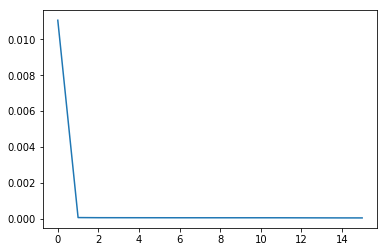

In [19]:
plt.plot(tmp)

### Evaluation

In [20]:
pick_index = np.random.choice(50000, 1000)

In [21]:
test_X = np.zeros((1000, 200, 16, 256))
test_y = np.zeros(1000)
cnt = 0;
for i in pick_index:
    test_X[cnt] = np.load(input_files[i]).squeeze().transpose(2,0,1)
    test_y[cnt] = np.load(output_files[i])
    print(cnt)
    cnt += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#### perspective of data

In [22]:
from scipy import stats

In [23]:
test_X.min(), test_X.max(), test_X.mean(), np.median(test_X)

(3.6935525912753778e-09,
 0.37272022441372399,
 0.0017747400716897558,
 0.00021888249046968233)

#### predict

In [24]:
pred_X = model.forward(torch.from_numpy(test_X[:42]).cuda().float())

RuntimeError: Given groups=1, weight[8, 16, 3, 3], so expected input[42, 200, 16, 256] to have 16 channels, but got 200 channels instead

In [ ]:
pred_X = pred_X.cpu().detach().numpy()

In [ ]:
pred_X.shape

In [ ]:
test_X.shape

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
res = mean_absolute_error(pred_X.reshape(42,-1).swapaxes(0,1), test_X[:42].reshape(42, -1).swapaxes(0,1), multioutput='raw_values')

In [ ]:
res.shape

In [ ]:
res.mean()